# Data Cleansing

> Cleaning data is like doing your dishes — it's not fun, but you can't cook without clean pots.

 -- *Monica Rogati*

## Preparing our data for Sentiment Analysis

---



## Importing libraries

In [1]:
import pandas as pd
import numpy as np

## Loading the Data

**This data was scraped from multiple subreddits for the purpose of sentiment analysis**

In [2]:
from pathlib import Path

# Get current notebook location
notebook_dir = Path().resolve()

# Build path to the dataset (go up 2 levels to reach project root)
file_path = notebook_dir.parent.parent / 'data' / 'Raw data (Reddit posts)' / 'emotions_dataset.csv'

# Load with pandas
df = pd.read_csv(file_path)


In [3]:
df.head()

,Post_id,Title,Text,emotion,subreddit
0,jhc5fc,"I’ve wasted so much time being depressed, that...",I can’t imagine how many days I have wasted to...,depressed,depression
1,k47q9a,Anhedonia is the worst part of depression,"You're alive, but you aren't living. You feel ...",depressed,depression
2,i2h6dv,"Life doesn't ""get better"" unless you take acti...","Exercise/physical activity, eating healthy, sp...",depressed,depression
3,g6jgq0,High functioning depression is so easily over ...,I try and do anything and everything all day. ...,depressed,depression
4,kgmy1e,I secretly hope that I will be diagnosed with ...,"Hey Reddit. Drunk me here, mainly looking to v...",depressed,depression


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29419 entries, 0 to 29418
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Post_id    29419 non-null  object
 1   Title      29419 non-null  object
 2   Text       29419 non-null  object
 3   emotion    29419 non-null  object
 4   subreddit  29419 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [5]:
df.isna().sum()

Post_id      0
Title        0
Text         0
emotion      0
subreddit    0
dtype: int64

We do not have any null values

In [6]:
df.columns

Index(['Post_id', 'Title', 'Text', 'emotion', 'subreddit'], dtype='object')

**Data consists of**
- Unique Post_id
- Post Title
- Text - the main context of our analysis
- The emotion we have labelled it as
- The subreddit from where we have scraped it

In [7]:
df.duplicated().sum()

0

There are no duplicate records

In [8]:
df['emotion'].value_counts()

emotion
fearful      4019
depressed    3990
happy        3834
regret       3559
angry        3507
sad          3441
surprised    2605
neutral      2261
disgusted    2203
Name: count, dtype: int64

<Axes: xlabel='emotion'>

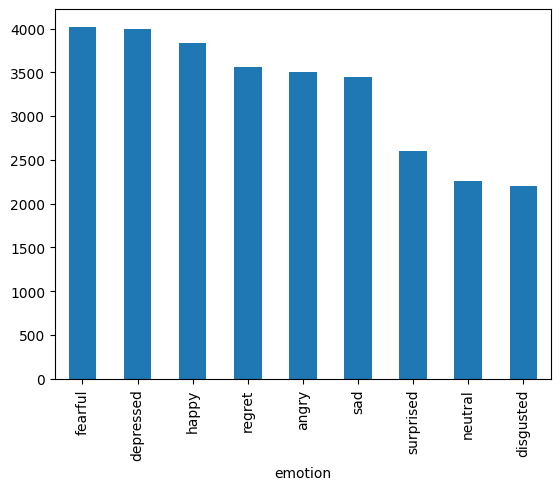

In [9]:
df['emotion'].value_counts().plot(kind='bar')

The data is having a balanced set of emotions

In [10]:
df.describe()

,Post_id,Title,Text,emotion,subreddit
count,29419,29419,29419,29419,29419
unique,29419,29299,29349,9,20
top,jhc5fc,6 Toxic Habits to Avoid if You Want to Be Happy,.,fearful,CasualConversation
freq,1,4,4,4019,3761


In [11]:
df['subreddit'].value_counts()

subreddit
CasualConversation    3761
TrueOffMyChest        3627
offmychest            2332
AskReddit             2211
confession            1808
unpopularopinion      1759
rant                  1703
mentalhealth          1662
depression            1580
tifu                  1072
NoStupidQuestions     1014
antiwork               917
selfimprovement        915
DecidingToBeBetter     901
lonely                 870
OCD                    838
GetMotivated           814
anxiety                780
socialanxiety          735
todayilearned          120
Name: count, dtype: int64

<Axes: xlabel='subreddit'>

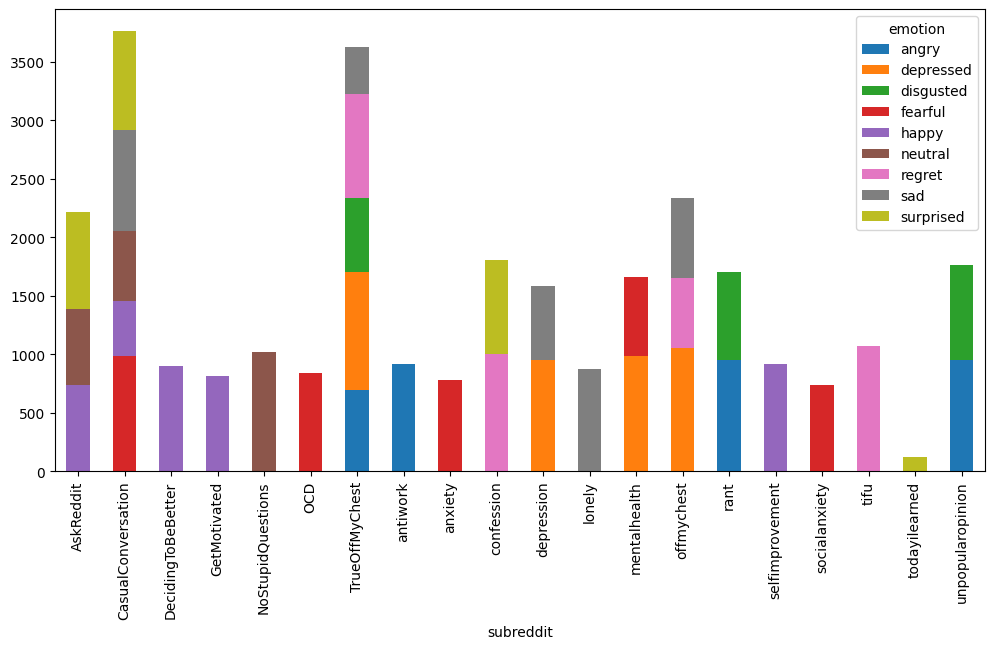

In [12]:
pd.crosstab(df['subreddit'], df['emotion']).plot(kind='bar', stacked=True, figsize=(12,6))


## Data Cleansing

---
### **STEPS INVOLVED**

1. Contractions (e.g. don't --> do not, I'm --> I am )
2. Lowercase
3. Remove noise (punctuation, mentions, emojis)
4. Tokenize
5. Remove stopwords
6. Stem or Lemmatize
7. Rejoin if needed

In [13]:
import re
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# download required data once
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def clean_text(text):
    # 1. Expand contractions
    text = contractions.fix(text)

    # 2. Lowercase
    text = text.lower()

    # 3. Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 4. Tokenize
    tokens = word_tokenize(text)

    # 5. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 7. Join back to string
    return ' '.join(tokens)


In [15]:
clean_text(df['Text'][0])

'imagine many day wasted sad cry able accomplish thing need responsibility deadline none seem matter dark episode force need done feel hopeless numb'

In [16]:
df['cleaned_text'] = df['Text'].apply(clean_text)

In [21]:
df[['Text','cleaned_text']].sample(5)

,Text,cleaned_text
16972,"Hey, \n\nSo I had a conversation with my siste...",hey conversation sister pretty much always own...
19532,Just gonna rant and maybe not make much sense ...,going rant maybe make much sense loneliness aw...
17660,And I didn't want to get him anything but I go...,want get anything got dollar gift card girlfri...
19021,"Today is my birthday and no one wished me ""Hap...",today birthday one wished happy birthday feel ...
1298,"I wanted to tell my story on the internet, bec...",wanted tell story internet grandson recently d...


Lets find the wordcounts of our data

In [22]:
def get_word_count(text):
    words = text.split(' ')
    return len(words)

In [23]:
df['word_count'] = df['Text'].apply(get_word_count)

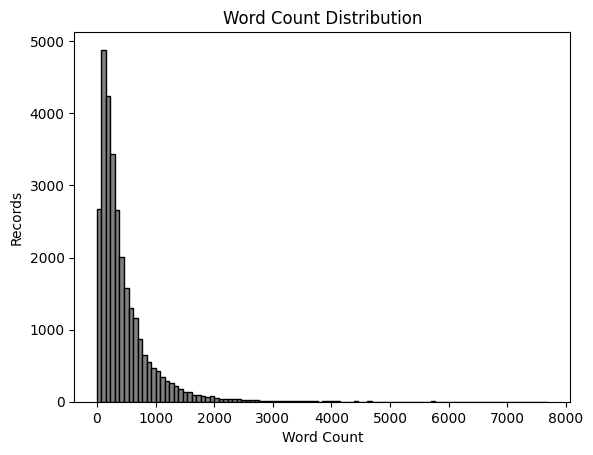

In [24]:
# Lets checkout the word count distribution
import matplotlib.pyplot as plt

plt.hist(df['word_count'], bins=100, color='gray', edgecolor='black')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Records")
plt.show()

In [25]:
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boolean mask for outliers
outliers = (df['word_count'] < lower_bound) | (df['word_count'] > upper_bound)

# Count
num_outliers = outliers.sum()

print(f"Number of outliers: {num_outliers}")


Number of outliers: 1968


We have about ~6% outliers which doesnt seem too bad and we can use them for further analysis because real world data is noisy and this can be helpful for training.

In [26]:
df[outliers].sample(5)[['Text','Post_id','word_count']]


,Text,Post_id,word_count
4594,[Remorse]: If you feel bad \n\nNear the end of...,2sm5jz,3041
24652,Social media and particularly large portions o...,13ti56e,1861
14753,About 3 months ago I scheduled my vacation day...,r7n8yu,1275
7223,So this I feel is like ridiculous.\n\n\nI pref...,zw8rv7,1508
22002,"I can't tell anyone this, even my therapist. L...",c11din,1320


In [27]:
# Now lets get the word count of cleaned text
df['cleaned_word_count'] = df['cleaned_text'].apply(get_word_count)

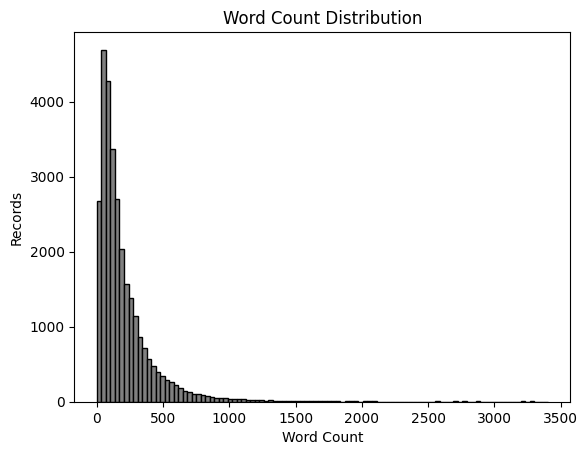

In [28]:
# Lets checkout the word count distribution
import matplotlib.pyplot as plt

plt.hist(df['cleaned_word_count'], bins=100, color='gray', edgecolor='black')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Records")
plt.show()

In [29]:
df['diff'] = df['word_count'] - df['cleaned_word_count']

In [30]:
from numpy import average


average(df['diff'])

249.91111186648084

Cleaning the text reduced the count of words by ~250 words per record

In [31]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

all_words = ' '.join(df['cleaned_text']).split()
filtered_words = [w for w in all_words if w.lower() not in stop_words]

word_freq = Counter(filtered_words).most_common(20)
print(word_freq)

[('like', 61276), ('would', 59291), ('time', 49324), ('get', 45878), ('know', 42887), ('people', 42046), ('one', 39962), ('feel', 38196), ('thing', 35881), ('life', 34697), ('day', 34214), ('year', 33826), ('want', 33477), ('even', 33335), ('could', 30890), ('really', 28461), ('go', 27406), ('never', 27404), ('friend', 26953), ('make', 26733)]


These are the 20 most common words after cleaning the data

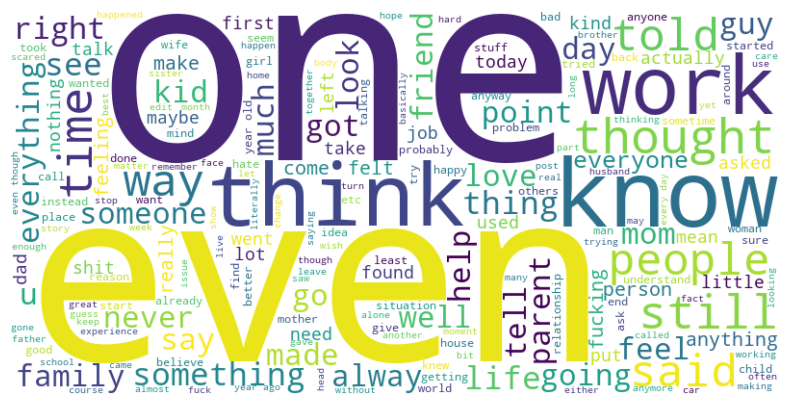

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['cleaned_text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [33]:
# There is no further use for it so we are dropping it
df.drop('diff',axis=1,inplace=True)

In [36]:
from transformers import pipeline, AutoTokenizer
import numpy as np

# Load model + tokenizer
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")


Device set to use cuda:0


**BERT has a max token limit of 512.**

**If text is longer, we need to truncate it, which may lead to the loss of important info.**
**So instead of truncating the sentence we are gonna split the sentence into chunks of 500 words and then calculate the avg of their sentiment**

In [37]:
def split_into_token_chunks(text, tokenizer, max_length=500):
    tokens = tokenizer.encode(text, truncation=False)
    chunks = [tokens[i:i+max_length] for i in range(0, len(tokens), max_length)]
    return [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in chunks]

In [38]:
def analyze_long_text(text):
    chunks = split_into_token_chunks(text, tokenizer=tokenizer)  # pass tokenizer here
    results = classifier(chunks)
    scores = {'POSITIVE': [], 'NEGATIVE': []}
    for res in results:
        scores[res['label']].append(res['score'])
    return {
        'avg_positive': sum(scores['POSITIVE']) / len(scores['POSITIVE']) if scores['POSITIVE'] else 0,
        'avg_negative': sum(scores['NEGATIVE']) / len(scores['NEGATIVE']) if scores['NEGATIVE'] else 0,
        'overall': 'POSITIVE' if sum(scores['POSITIVE']) >= sum(scores['NEGATIVE']) else 'NEGATIVE'
    }

In [39]:
df['placeholder'] = df['cleaned_text'].apply(analyze_long_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (1057 > 512). Running this sequence through the model will result in indexing errors
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [42]:
df.sample(5)

,Post_id,Title,Text,emotion,subreddit,cleaned_text,word_count,cleaned_word_count,placeholder
21433,9f2r9,So a neighbor trapped and killed my cat. I wan...,"Yes, he trapped and killed my cat, others as w...",surprised,AskReddit,yes trapped killed cat others well provide det...,355,170,"{'avg_positive': 0.978693962097168, 'avg_negat..."
2303,g9bq5h,Tired of all the bad news,I'm just so fucking tired of all the bad news....,depressed,mentalhealth,fucking tired bad news everywhere look pandemi...,105,47,"{'avg_positive': 0, 'avg_negative': 0.99936932..."
25217,11qqnbo,I started a daily gratitude journal and here's...,"Hey everyone,\n\nI just wanted to share someth...",happy,selfimprovement,hey everyone wanted share something completely...,187,89,"{'avg_positive': 0.9984455704689026, 'avg_nega..."
24008,s478w8,Dating Myself For The Next Two Years,"Hello, I’m u/Hopeful-Shoulder-796. I am a 25-y...",happy,DecidingToBeBetter,hello youhopefulshoulder yearold african ameri...,1201,581,"{'avg_positive': 0, 'avg_negative': 0.76751524..."
7604,4yh3v4,UPDATE: I am 21 years old and I have a driving...,My old post from yesterday: https://www.reddit...,fearful,anxiety,old post yesterday httpswwwredditcomranxietyco...,1806,758,"{'avg_positive': 0, 'avg_negative': 0.99625056..."


In [43]:
df['bert_sentiment'] = df['placeholder'].apply(lambda x: x['overall'])
df['bert_avg_pos'] = df['placeholder'].apply(lambda x: x['avg_positive'])
df['bert_avg_neg'] = df['placeholder'].apply(lambda x: x['avg_negative'])

In [44]:
df['bert_avg_neg'].sum()

26041.002733618094

In [45]:
df['bert_avg_pos'].sum()

2883.88134804368

In [47]:
df[['bert_sentiment','bert_avg_pos','bert_avg_neg']].sample(5)

,bert_sentiment,bert_avg_pos,bert_avg_neg
217,NEGATIVE,0.0,0.995977
608,NEGATIVE,0.0,0.980693
18896,NEGATIVE,0.0,0.998566
15145,NEGATIVE,0.0,0.998684
15445,NEGATIVE,0.0,0.990323


In [49]:
df.sample(5)

,Post_id,Title,Text,emotion,subreddit,cleaned_text,word_count,cleaned_word_count,placeholder,bert_sentiment,bert_avg_pos,bert_avg_neg
18249,16buext,Update: My wife stole our daughter's college m...,"Hello everyone,\n\nIt’s been a long time since...",sad,TrueOffMyChest,hello everyone long time since lot happened tr...,816,366,"{'avg_positive': 0, 'avg_negative': 0.98563331...",NEGATIVE,0.0,0.985633
3017,1dy1dqh,I found out my rapist is my girlfriend’s uncle,"Throwaway account. I’m a high school male, and...",depressed,TrueOffMyChest,throwaway account high school male asian city ...,450,188,"{'avg_positive': 0, 'avg_negative': 0.99702805...",NEGATIVE,0.0,0.997028
18235,1duxpms,My dog died during the night and it kills me t...,"Our dog, a 13 year old Hungarian vizsla, was a...",sad,TrueOffMyChest,dog year old hungarian vizsla pet boarder vaca...,980,458,"{'avg_positive': 0, 'avg_negative': 0.99465656...",NEGATIVE,0.0,0.994657
26741,uwsh9,My boyfriend (who claimed he wanted to marry m...,"I hadn't told anyone, and thought I could coun...",happy,AskReddit,told anyone thought could count understand sup...,191,91,"{'avg_positive': 0, 'avg_negative': 0.97415608...",NEGATIVE,0.0,0.974156
589,1g9mnuy,"Everyone says if you're depressed, don't be af...","Well, we try to. And guess what? No one cares....",depressed,depression,well try guess one care everyone busy life pro...,70,32,"{'avg_positive': 0, 'avg_negative': 0.99660313...",NEGATIVE,0.0,0.996603


<Axes: xlabel='bert_sentiment'>

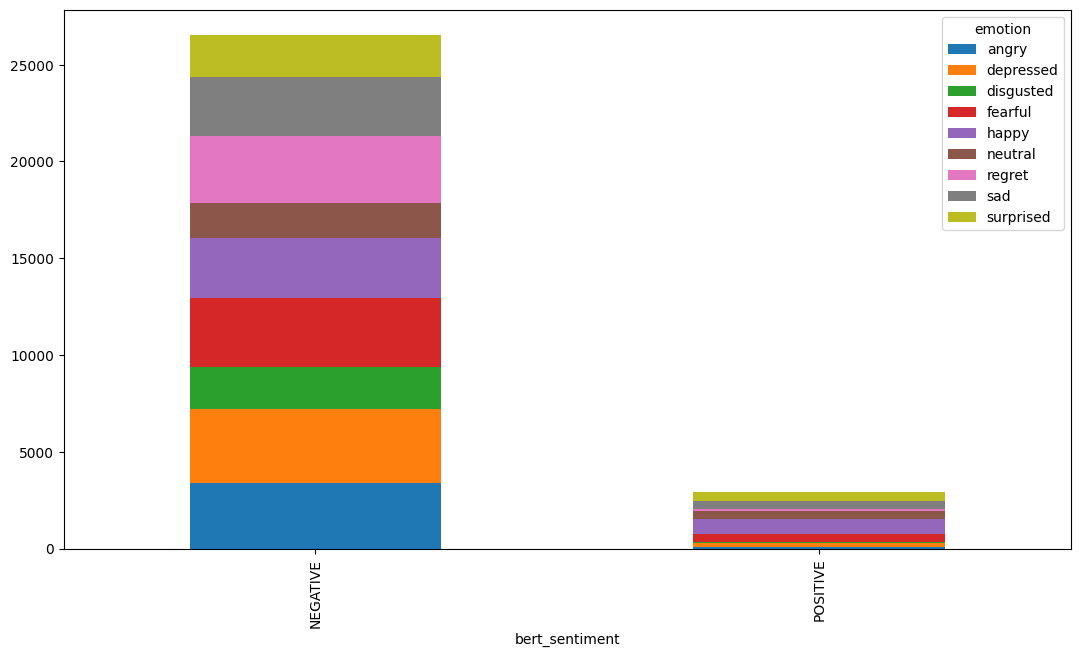

In [50]:
pd.crosstab(df['bert_sentiment'], df['emotion']).plot(kind='bar', stacked=True, figsize=(13,7))

In [51]:
df['emotion_vs_sentiment'] = df.apply(
    lambda row: 'match' if (
        (row['emotion'] == 'angry' and row['bert_sentiment'] == 'NEGATIVE') or
        (row['emotion'] == 'depressed' and row['bert_sentiment'] == 'NEGATIVE') or
        (row['emotion'] == 'disgusted' and row['bert_sentiment'] == 'NEGATIVE') or
        (row['emotion'] == 'fearful' and row['bert_sentiment'] == 'NEGATIVE') or
        (row['emotion'] == 'happy' and row['bert_sentiment'] in ['POSITIVE']) or
        (row['emotion'] == 'regret' and row['bert_sentiment'] in ['NEGATIVE']) or
        (row['emotion'] == 'sad' and row['bert_sentiment'] in ['NEGATIVE']) or
        (row['emotion'] == 'surprised' and row['bert_sentiment'] in ['POSITIVE'])
        # (row['emotion'] == 'neutral' and row['bert_sentiment'] == 'NEUTRAL')
    ) else 'mismatch',
    axis=1
)

df['emotion_vs_sentiment'] = df.apply(
    lambda row: 'neutral' if (row['emotion'] == 'neutral') else row['emotion_vs_sentiment'],
    axis=1
)

In [52]:
df['emotion_vs_sentiment'].value_counts()

emotion_vs_sentiment
match       20667
mismatch     6491
neutral      2261
Name: count, dtype: int64

In [53]:
from transformers import pipeline

# Use pre-trained sentiment analysis model
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [54]:
df[df['emotion_vs_sentiment'] == 'mismatch'][['Post_id','cleaned_text','bert_sentiment','bert_avg_neg','emotion','word_count']]

,Post_id,cleaned_text,bert_sentiment,bert_avg_neg,emotion,word_count
13,e88epz,stuck home nothing friend reason go outside fa...,POSITIVE,0.000000,depressed,152
78,78jn7s,best friend since year older started dating sh...,POSITIVE,0.000000,depressed,362
80,b6wxxb,title say considering hopping back dating scen...,POSITIVE,0.000000,depressed,169
90,1e9x4x8,never drinker tonight decided drink whiskey st...,POSITIVE,0.000000,depressed,51
114,1hl41sl,highly sensitive person precisely know thing b...,POSITIVE,0.000000,depressed,67
...,...,...,...,...,...,...
27151,hhzc5,okay honest kind functionally retarded come in...,NEGATIVE,0.982643,happy,90
27152,but7y,reddit american redditor read news consider pr...,NEGATIVE,0.996041,happy,86
27155,l8bnh,update shit went first thanks idea helped hour...,NEGATIVE,0.995566,happy,653
27156,g5f0k,hey really know explain everyday read news any...,NEGATIVE,0.997817,happy,180


In [55]:
classifier(str(df[df['Post_id'] == 'l8bnh']['cleaned_text']))


[{'label': 'NEGATIVE', 'score': 0.9980522394180298}]

In [56]:
file_path = notebook_dir.parent.parent / 'data' / 'Cleaned data (Reddit posts)' / 'cleaned_data.csv'
df.to_csv(file_path)

### TF-IDF Transformation
- Weighs words by importance

- Common words = less weight

- Rare but meaningful words = more weight

In [57]:
df = pd.read_csv(file_path)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')


Fitting and Transforming the Cleaned Text

In [59]:
df[['Post_id','cleaned_text']][df['cleaned_text'].isna() == True]
# After cleaning we have some missing text so we are going to drop them

,Post_id,cleaned_text
9001,100n3g2,NaN
9819,ybz4bl,NaN
11289,nwvdp1,NaN
18427,57hl40,NaN
21376,273mmf,NaN
27077,32v7wv,NaN


In [60]:
df = df.dropna(subset=['cleaned_text'])

In [61]:
X = tfidf.fit_transform(df['cleaned_text'])  # shape: (n_samples, n_features)

In [62]:
tfidf.get_feature_names_out()[:20]  # top 20 words

array(['abandon', 'abandoned', 'abandonment', 'ability', 'able',
       'abortion', 'abroad', 'absence', 'absent', 'absolute',
       'absolutely', 'absurd', 'abuse', 'abused', 'abuser', 'abusing',
       'abusive', 'academic', 'accent', 'accept'], dtype=object)

In [63]:
print(X.shape)         # e.g., (10000, 5000)
print(X.toarray()[0])  # first row of TF-IDF vector

(29413, 5000)
[0. 0. 0. ... 0. 0. 0.]


In [64]:
def evaluate(X,log=False,NB=False,SVC=False,GNB = False):

    from sklearn.model_selection import train_test_split

    y = df['emotion']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123456)
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.svm import LinearSVC
    from sklearn.metrics import accuracy_score
    from sklearn.naive_bayes import GaussianNB

    if log:
        # Logistic Regression
        lr = LogisticRegression(max_iter=1000)
        lr.fit(X_train, y_train)
        lr_pred = lr.predict(X_test)
        print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

    if NB:
        # Naive Bayes
        nb = MultinomialNB()
        nb.fit(X_train, y_train)
        nb_pred = nb.predict(X_test)
        print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

    if SVC:
        # SVM
        svm = LinearSVC()
        svm.fit(X_train, y_train)
        svm_pred = svm.predict(X_test)
        print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

    if GNB:
        nb = GaussianNB()
        nb.fit(X_train, y_train)
        nb_pred = nb.predict(X_test)
        print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


In [65]:
evaluate(X,True,True,True)

Logistic Regression Accuracy: 0.6335203127655958
Naive Bayes Accuracy: 0.5121536630970593
SVM Accuracy: 0.6042835288118307


### Word2Vec / GloVe (Classic Embeddings)

In [66]:
import gensim.downloader as api
from numpy import mean
import numpy as np

In [67]:
w2v_model = api.load('glove-wiki-gigaword-100')  # or 'word2vec-google-news-300'


In [68]:
def sentence_vector(sentence):
    words = sentence.split()
    vectors = [w2v_model[word] for word in words if word in w2v_model]
    if len(vectors) == 0:
        return np.zeros(100)
    return mean(vectors, axis=0)

X_glove = np.array([sentence_vector(text) for text in df['cleaned_text']])


In [69]:
evaluate(X_glove,True,False,True, True)

Logistic Regression Accuracy: 0.44518103008669047
SVM Accuracy: 0.44161142274349824
Gaussian Naive Bayes Accuracy: 0.3302736698963114


### BERT

In [42]:
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load once
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained('bert-base-uncased')
bert.eval()

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert = bert.to(device)

def batch_bert_embeddings(texts, batch_size=16):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128)
        encoded = {k: v.to(device) for k, v in encoded.items()}
        with torch.no_grad():
            outputs = bert(**encoded)
        cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        all_embeddings.extend(cls_embeddings)
    return np.array(all_embeddings)

X_bert = batch_bert_embeddings(df['cleaned_text'].tolist(), batch_size=32)



In [44]:
evaluate(X_bert,True,False,True, True)

d:\CDAC\Final Project\Hikari-An-AI-Emotional-Support-Chatbot\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.4377018527961924
SVM Accuracy: 0.4371919088900221
Gaussian Naive Bayes Accuracy: 0.3127655957844637
